In [1]:
import pickle
data = pickle.load(open('data/karate_cleaned.p','rb'))
# data

# Spectral clustering via the Cheeger vector

In [2]:
import numpy as np
from scipy.sparse import csgraph

In [3]:
matrix = data['matrix']
for a in matrix:
    print a

[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
[1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
[1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0

### Normalized Graph Laplacian

In [4]:
ngl = csgraph.laplacian(matrix.astype(float), normed=True)
ngl

array([[ 1.        , -0.08333333, -0.07905694, ..., -0.10206207,
        -0.        , -0.        ],
       [-0.08333333,  1.        , -0.10540926, ..., -0.        ,
        -0.        , -0.        ],
       [-0.07905694, -0.10540926,  1.        , ..., -0.        ,
        -0.09128709, -0.        ],
       ..., 
       [-0.10206207, -0.        , -0.        , ...,  1.        ,
        -0.11785113, -0.09901475],
       [-0.        , -0.        , -0.09128709, ..., -0.11785113,
         1.        , -0.070014  ],
       [-0.        , -0.        , -0.        , ..., -0.09901475,
        -0.070014  ,  1.        ]])

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

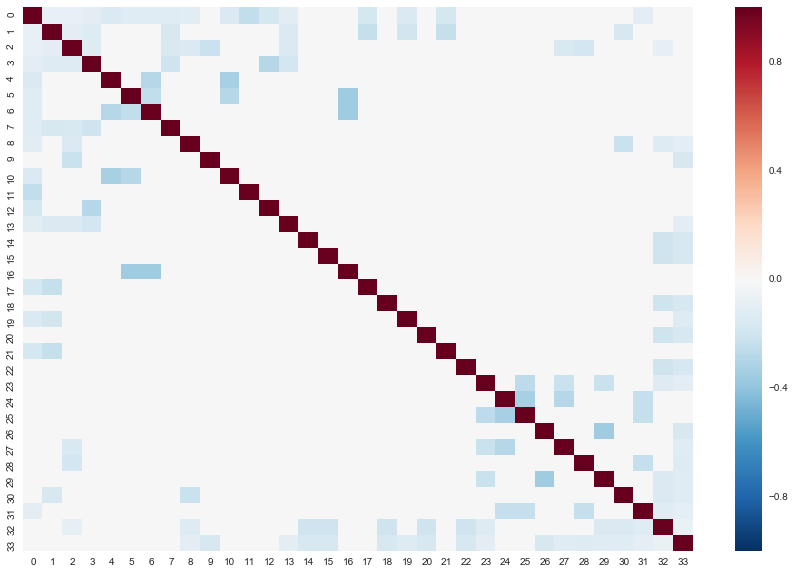

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(ngl)

### Eigenvectors and Eigenvalues

In [7]:
from scipy.linalg import eig

In [8]:
(eigenvalues, eigenvectors) = eig(ngl, right=False, left=True)
print eigenvectors.shape
print eigenvalues
eigenvectors

(34, 34)
[ -2.49800181e-16+0.j   1.32272329e-01+0.j   2.87048985e-01+0.j
   3.87313233e-01+0.j   1.71461135e+00+0.j   6.12230540e-01+0.j
   6.48992947e-01+0.j   7.07208202e-01+0.j   7.39957989e-01+0.j
   7.70910617e-01+0.j   8.22942852e-01+0.j   8.64832945e-01+0.j
   9.06816002e-01+0.j   1.10538084e+00+0.j   1.15929996e+00+0.j
   1.26802355e+00+0.j   1.61190959e+00+0.j   1.56950660e+00+0.j
   1.35177826e+00+0.j   1.39310454e+00+0.j   1.41691585e+00+0.j
   1.44857938e+00+0.j   1.49703011e+00+0.j   1.58333333e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j]


array([[ -3.20256308e-01,  -2.96399797e-01,   1.44586983e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -2.40192231e-01,  -1.13413889e-01,   3.50466912e-01, ...,
          1.02381971e-16,   1.06364095e-17,   1.59074765e-16],
       [ -2.53184842e-01,   8.97112612e-03,   2.11481660e-01, ...,
         -2.19799805e-17,  -1.03550800e-16,   4.96462301e-16],
       ..., 
       [ -1.96116135e-01,   1.28108134e-01,  -1.10871456e-01, ...,
          1.24049165e-16,  -1.59003548e-16,   4.68327043e-17],
       [ -2.77350098e-01,   2.51627460e-01,  -1.12649647e-01, ...,
         -4.80002082e-16,  -4.22277765e-16,   8.22532117e-16],
       [ -3.30112646e-01,   2.69793542e-01,  -9.23627895e-02, ...,
          5.37478772e-16,   2.97317487e-16,  -7.58639980e-16]])

Eigenvalues
[ -2.49800181e-16+0.j   1.32272329e-01+0.j   2.87048985e-01+0.j
   3.87313233e-01+0.j   1.71461135e+00+0.j   6.12230540e-01+0.j
   6.48992947e-01+0.j   7.07208202e-01+0.j   7.39957989e-01+0.j
   7.70910617e-01+0.j   8.22942852e-01+0.j   8.64832945e-01+0.j
   9.06816002e-01+0.j   1.10538084e+00+0.j   1.15929996e+00+0.j
   1.26802355e+00+0.j   1.61190959e+00+0.j   1.56950660e+00+0.j
   1.35177826e+00+0.j   1.39310454e+00+0.j   1.41691585e+00+0.j
   1.44857938e+00+0.j   1.49703011e+00+0.j   1.58333333e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j]

Eigenvectors
[[ -3.20256308e-01  -2.96399797e-01   1.44586983e-01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.40192231e-01  -1.13413889e-01   3.50466912e-01 ...,   1.02381971e-16
    1.06364095e-17   1.59074765e-16]
 [ -2.53184842e-01   8.

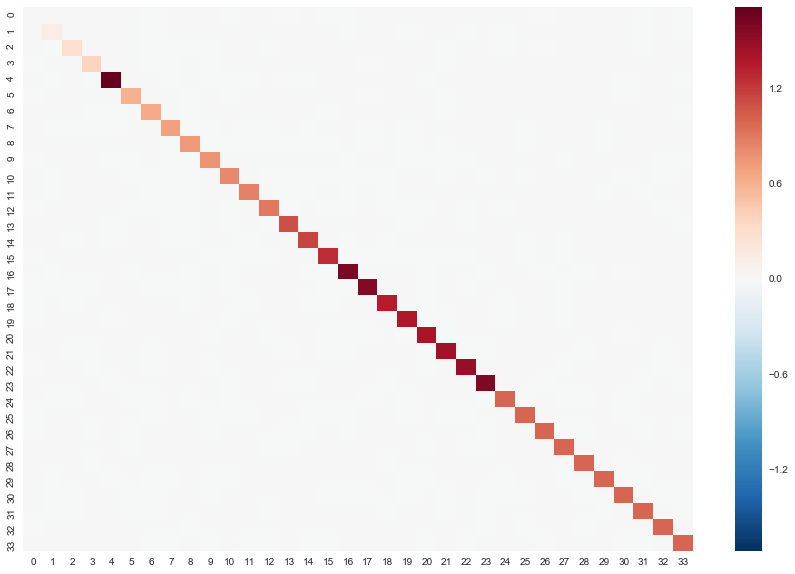

In [9]:
print 'Eigenvalues\n', eigenvalues
print '\nEigenvectors\n', eigenvectors
from numpy.linalg import inv
(eigenvalues, eigenvectors) = eig(ngl, left=True,right=False)
a = np.dot(np.dot(inv(eigenvectors),ngl),eigenvectors)
plt.figure(figsize=(15,10))
print '\nInvert in this base (sanity check)\n'
sns.heatmap(a)

### Sorting the eigenvectors by norm (but that's useless)

In [10]:
# Sort by norm
indexlist = np.argsort(np.linalg.norm(eigenvectors,axis=1))

# Just for test purposes
# indexlist = np.arange(34)
# indexlist=reversed(indexlist)
print indexlist
sorted_eigenvectors = np.array([eigenvectors[:,k] for k in indexlist]).T

[20 22  9 18 19  7 28 15 27 25 12 11  3  8  2 30 16  0 33 29  1 31 32 26 24
 10  4  6  5 23 14 21 17 13]


In [11]:
# a = np.dot(np.dot(inv(sorted_eigenvectors),ngl),sorted_eigenvectors)
# plt.figure(figsize=(15,10))
# sns.heatmap(a)

### Sort by eigenvalues

In [12]:
(eigenvalues, eigenvectors) = eig(ngl, left=True,right=False)
print eigenvalues.shape
eigenvalues

(34,)


array([ -2.49800181e-16+0.j,   1.32272329e-01+0.j,   2.87048985e-01+0.j,
         3.87313233e-01+0.j,   1.71461135e+00+0.j,   6.12230540e-01+0.j,
         6.48992947e-01+0.j,   7.07208202e-01+0.j,   7.39957989e-01+0.j,
         7.70910617e-01+0.j,   8.22942852e-01+0.j,   8.64832945e-01+0.j,
         9.06816002e-01+0.j,   1.10538084e+00+0.j,   1.15929996e+00+0.j,
         1.26802355e+00+0.j,   1.61190959e+00+0.j,   1.56950660e+00+0.j,
         1.35177826e+00+0.j,   1.39310454e+00+0.j,   1.41691585e+00+0.j,
         1.44857938e+00+0.j,   1.49703011e+00+0.j,   1.58333333e+00+0.j,
         1.00000000e+00+0.j,   1.00000000e+00+0.j,   1.00000000e+00+0.j,
         1.00000000e+00+0.j,   1.00000000e+00+0.j,   1.00000000e+00+0.j,
         1.00000000e+00+0.j,   1.00000000e+00+0.j,   1.00000000e+00+0.j,
         1.00000000e+00+0.j])

In [13]:
print np.argsort(eigenvalues)
[eigenvalues[k] for k in np.argsort(eigenvalues)]

[ 0  1  2  3  5  6  7  8  9 10 11 12 24 30 32 31 27 26 33 25 29 28 13 14 15
 18 19 20 21 22 17 23 16  4]


[(-2.4980018054066022e-16+0j),
 (0.13227232922951659+0j),
 (0.28704898538503493+0j),
 (0.38731323261013068+0j),
 (0.61223054020030909+0j),
 (0.64899294666920038+0j),
 (0.70720820249415162+0j),
 (0.73995798930084333+0j),
 (0.77091061685113016+0j),
 (0.82294285233819053+0j),
 (0.86483294458061954+0j),
 (0.90681600158647535+0j),
 (0.999999999999998+0j),
 (0.99999999999999822+0j),
 (0.99999999999999933+0j),
 (0.99999999999999978+0j),
 (0.99999999999999989+0j),
 (0.99999999999999989+0j),
 (0.99999999999999989+0j),
 (1+0j),
 (1.0000000000000004+0j),
 (1.0000000000000007+0j),
 (1.1053808390082949+0j),
 (1.1592999555430796+0j),
 (1.2680235467032606+0j),
 (1.3517782590320488+0j),
 (1.39310454092137+0j),
 (1.4169158506381598+0j),
 (1.4485793824675033+0j),
 (1.4970301128853551+0j),
 (1.5695066032433369+0j),
 (1.5833333333333335+0j),
 (1.6119095875050404+0j),
 (1.7146113474736213+0j)]

so the second smallest eigenvalues is the second in the list eigenvalues (0.132272329229)

In [14]:
second_smallest_eigenvalues = eigenvalues[1]
print second_smallest_eigenvalues
associated_eigenvectors = eigenvectors[33]
v = associated_eigenvectors

(0.13227232923+0j)


v is our **Fiedler Vector**

In [15]:
print v

[ -3.30112646e-01   2.69793542e-01  -9.23627895e-02   2.18661102e-01
   4.73255919e-01   9.17836092e-03  -4.39766176e-02  -1.16118335e-02
   1.56684350e-01  -1.77678854e-01   1.85837521e-01   9.81591988e-02
  -3.57825673e-01   3.42668664e-01  -2.90224039e-01   5.15577338e-03
  -1.16016075e-01   1.75400846e-01  -6.81660922e-02  -3.36737452e-02
  -4.26103807e-02  -2.43086370e-02  -2.30973780e-01   1.12461718e-15
  -1.01226332e-15   1.91968675e-15   2.50455090e-16  -5.94064626e-17
  -6.50928136e-16   1.15104338e-15   6.06634048e-16   5.37478772e-16
   2.97317487e-16  -7.58639980e-16]


According to the sign, it give us the grouping:

In [16]:
# Every negative and corresponding indexes
REDS = filter(lambda a: a!='', [index+1 if v[index] <= 0 else '' for index,a in enumerate(v)])
print REDS
print data['red_list']

[1, 3, 7, 8, 10, 13, 15, 17, 19, 20, 21, 22, 23, 25, 28, 29, 34]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 17, 18, 20, 22]


In [17]:
correct = filter(lambda a:a in REDS,data['red_list'])
print 'Correct',correct ,len(correct)
wrong = filter(lambda a:a not in REDS,data['red_list'])
print 'Wrong',wrong ,len(wrong)

Correct [1, 3, 7, 8, 13, 17, 20, 22] 8
Wrong [2, 4, 5, 6, 9, 11, 12, 14, 18] 9


In [18]:
# Every positive
BLUES = filter(lambda a: a!='', [index+1 if v[index] > 0 else '' for index,a in enumerate(v)])
print BLUES
print data['blue_list']

[2, 4, 5, 6, 9, 11, 12, 14, 16, 18, 24, 26, 27, 30, 31, 32, 33]
[10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [19]:
correct = filter(lambda a:a in BLUES,data['blue_list'])
print 'Correct',correct,len(correct)
wrong = filter(lambda a:a not in BLUES,data['blue_list'])
print 'Wrong',wrong ,len(wrong)

Correct [16, 24, 26, 27, 30, 31, 32, 33] 8
Wrong [10, 15, 19, 21, 23, 25, 28, 29, 34] 9


# Just Visualisations

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]


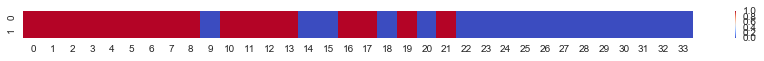

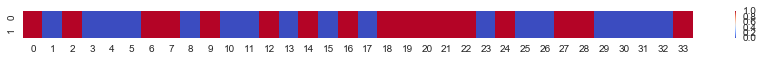

In [20]:
ground_truth = [0 if x in data['blue_list'] else 1 for x in range(1,35)]

print ground_truth
plt.figure(figsize=(15,0.5))
sns.heatmap([ground_truth,ground_truth],cmap='coolwarm')

results = [0 if x in BLUES else 1 for x in range(1,35)]
print results
plt.figure(figsize=(15,0.5))
sns.heatmap([results,results],cmap='coolwarm')

![alt src](project2_images/cluster.png)

In [21]:
for a in data['graph']['nodes']:
    a['group'] = 'red' if a['id'] in REDS else 'blue'

import json
with open('cluster_karate_B.json', 'w') as outfile:
    json.dump(data['graph'], outfile)

![alt src](project2_images/cluster_comparison_A.png)

...not that efficient   
**there might be something wrong with my code**

## Using Scikit Learn

Ground Truth
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Spectral Clustering
[1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.204094758281
0.271689477828


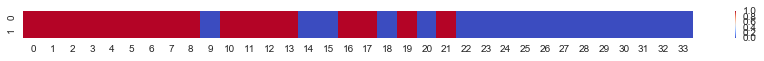

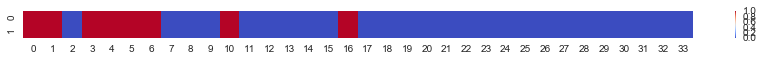

In [22]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics

# Cluster
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(matrix)


print 'Ground Truth'
ground_truth = [0 if x in data['blue_list'] else 1 for x in range(1,35)]
print ground_truth
plt.figure(figsize=(15,0.5))
sns.heatmap([ground_truth,ground_truth],cmap='coolwarm')


print('Spectral Clustering')
print(sc.labels_)
plt.figure(figsize=(15,0.5))
sns.heatmap([sc.labels_,sc.labels_],cmap='coolwarm')

# Calculate some clustering metrics
print(metrics.adjusted_rand_score(ground_truth, sc.labels_))
print(metrics.adjusted_mutual_info_score(ground_truth, sc.labels_))

those are pretty good results!
![alt src](project2_images/cluster_B.png)

# Tuning parameters and adding KNN

In [23]:
sc = SpectralClustering(2, affinity='precomputed', n_init=100, assign_labels='discretize')
sc.fit(matrix)

SpectralClustering(affinity='precomputed', assign_labels='discretize',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=2, n_init=100, n_jobs=1,
          n_neighbors=10, random_state=None)

Ground Truth
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Spectral Clustering
[1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
0.771725032425
0.722546051351


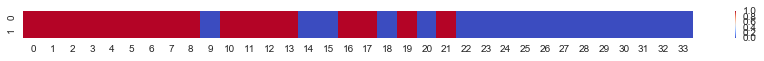

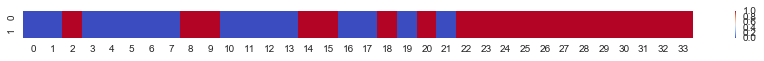

In [24]:
print 'Ground Truth'
ground_truth = [0 if x in data['blue_list'] else 1 for x in range(1,35)]
print ground_truth
plt.figure(figsize=(15,0.5))
sns.heatmap([ground_truth,ground_truth],cmap='coolwarm')


print('Spectral Clustering')
print(sc.labels_)
plt.figure(figsize=(15,0.5))
sns.heatmap([1-sc.labels_,1-sc.labels_],cmap='coolwarm')

# Calculate some clustering metrics
print(metrics.adjusted_rand_score(ground_truth, sc.labels_))
print(metrics.adjusted_mutual_info_score(ground_truth, sc.labels_))

In [25]:
for a in data['graph']['nodes']:
    a['group'] = 'red' if sc.labels_[a['id']-1] == 0 else 'blue'

import json
with open('cluster_karate_B.json', 'w') as outfile:
    json.dump(data['graph'], outfile)

![alt src](project2_images/final_clustering.png)